# Optical Character Recognition(OCR) with Tesseract, OpenCV, and Python

## Building word clouds on Review images

Step 1: Create list of all the available review images

In [16]:
import os

folderPath = "Reviews"
myRevList = os.listdir(folderPath)
myRevList

['5.PNG',
 '9.PNG',
 '8.PNG',
 '14.PNG',
 '7.PNG',
 '11.PNG',
 '12.PNG',
 '3.PNG',
 '10.PNG',
 '13.PNG',
 '15.PNG',
 '4.PNG',
 '6.PNG',
 '2.PNG',
 '1.PNG']

Step 2: View all the images using `cv2.imshow()` method

In [17]:
import cv2
for image in  myRevList:
    img = cv2.imread(f'{folderPath}/{image}')
    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Step 3: Read text from images using pytesseract

In [18]:
import pytesseract

corpus = []
for images in myRevList:
    img = cv2.imread(f'{folderPath}/{images}')
    if img is None:
        corpus.append("Could not read the image.")
    else:
        rev = pytesseract.image_to_string(img)
        corpus.append(rev)

list(corpus)
corpus

['Awesome beast for gaming @@ and best budget ipad\n\x0c',
 "Don't think too much about mini, Pro or Air models. The regular iPad is perfect for all needs. Great display and processor. For laptop feel, Buy an USB adapter and hub to\nconnect pendrives, keyboard or mouse. | bought a cheaper apple pencil alternative just with palm rejection, It works great. And | loved digital note taking so far! 32GB is not\nenough if you play many games. For basic purpose and media consumption, you can use 32GB for apps + external flash drive for media storage. It works perfect.\n\x0c",
 "Wriiting a review after a month. Well it is apple so no wonder it has to be amazing. The con- the simcard slot for which we pay a good amount of money (by not just going for\nonly WIFI one), it only has sim slot for 4g Ite. No calls. The sim card doesn't allow you to make calls. That was news to me, But no issues as it does allow me to survive with the\nipad in a no wifi zone.\n\nSo, yes it is PERFECT\n\n \n\x0c",
 'Th

Step 4: Create a dataframe

In [19]:
import pandas as pd

data = pd.DataFrame(list(corpus), columns=['Review'])
data

,Review
0,Awesome beast for gaming @@ and best budget ip...
1,"Don't think too much about mini, Pro or Air mo..."
2,Wriiting a review after a month. Well it is ap...
3,This was my first ipad from apple .....price i...
4,| bought this because it is highly needed for ...
5,This product marked my initiation into the App...
6,"Well, I don't use it for gaming. | just use it..."
7,pad 8 excels with A12 processor which makes it...
8,Just go for it . Budget Ipads never disappoint...
9,Best value for money for a dependable educatio...


Step 5: Preprocess the text - remove special characters, stopwords

In [20]:
#removing special characters
import re

def clean(text):
    return re.sub('[^A-Za-z0-9" "]+', ' ', text)

data['Cleaned Review'] = data['Review'].apply(clean)
data

,Review,Cleaned Review
0,Awesome beast for gaming @@ and best budget ip...,Awesome beast for gaming and best budget ipad
1,"Don't think too much about mini, Pro or Air mo...",Don t think too much about mini Pro or Air mo...
2,Wriiting a review after a month. Well it is ap...,Wriiting a review after a month Well it is ap...
3,This was my first ipad from apple .....price i...,This was my first ipad from apple price is so...
4,| bought this because it is highly needed for ...,bought this because it is highly needed for ...
5,This product marked my initiation into the App...,This product marked my initiation into the App...
6,"Well, I don't use it for gaming. | just use it...",Well I don t use it for gaming just use it...
7,pad 8 excels with A12 processor which makes it...,pad 8 excels with A12 processor which makes it...
8,Just go for it . Budget Ipads never disappoint...,Just go for it Budget Ipads never disappoint...
9,Best value for money for a dependable educatio...,Best value for money for a dependable educatio...


In [21]:
# removing stopwords
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/the_nerd_vine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/the_nerd_vine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
final_list = []
for column in data[['Cleaned Review']]:
    columnSeriesObj = data[column]
    all_rev = columnSeriesObj.values
    for i in range(len(all_rev)):
        tokens = word_tokenize(all_rev[i])
        for word in tokens:
            if word.lower() not in stop_words:
                final_list.append(word)
print(len(final_list))

535


Step 6: Build Positive, Negative Word Clouds

In [23]:
with open(r"./opinion-lexicon-English/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
poswords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite the following paper:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 '; Notes: ',
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ',
 ';       mean that the sentence expresses a positive or negative opinion. ',
 ';       See the paper below:',
 ';',
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ',
 ';          Handbook of Natural Lan

In [24]:
with open(r"./opinion-lexicon-English/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")
negwords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite the following paper:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ',
 ';       mean that the sentence expresses a positive or negative opinion. ',
 ';       See the paper below:',
 ';',
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ',
 ';          Handbook of Nat

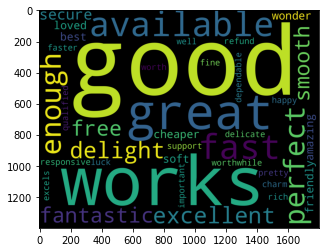

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# positive word cloud
# Choosing the only words which are present in poswords
pos_in_pos = " ".join([w for w in final_list if w in poswords])

wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(pos_in_pos)

plt.imshow(wordcloud_pos)

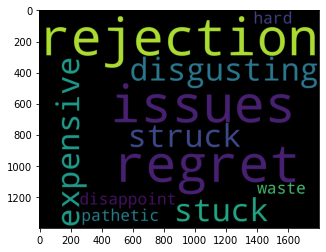

In [26]:
# negative word cloud
# Choosing the only words which are present in negwords
neg_in_neg = " ".join([w for w in final_list if w in negwords])

wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(neg_in_neg)

plt.imshow(wordcloud_neg)

##  Create audible files (Text to Audio)

In [27]:
# import necessary libraries
import cv2
import pytesseract

from gtts import gTTS
import os

# read image using cv2.imread() method
rev = cv2.imread("./Reviews/15.PNG")

# display the image using cv2.imshow() method
# cv2.imshow("Image", rev)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# grab the text from image using pytesseract
txt = pytesseract.image_to_string(rev)
print(txt)

# set language
language = 'en'

# create a gTTS object
outObj = gTTS(text=txt, lang=language, slow=False)

# Save the audio file as rev.mp3
outObj.save("rev.mp3")

# play the .mp3 file
print('playing the audio file')
os.system('rev.mp3')

Okay so | brought the 32gb version. And honestly | had to sell it to someone else on OLX after 3 days of usage. Reason being that the memory available remain is on 17GB.
Which will get filled in matter of days. If you install couple of good games (3-4).

Further the sound from speaker is pathetic.

Didn't expect both these from Apple.

So | sold this on OLX and brought Galaxy Tab S6 Lite (Wi-Fi) tab. It has 64gb hard drive and memory card support as well. Sound is also pretty good.

Please don't waste your money on Apple. Useless product with high price

playing the audio file


sh: 1: rev.mp3: not found


32512

#### Build sample OCR Script

In [ ]:
import cv2

import pytesseract

img = cv2.imread("./image.jpg")

img = cv2.resize(img, (400, 450))

cv2.imshow("Image", img)

text = pytesseract.image_to_string(img)
print(text)

cv2.waitKey(0)

cv2.destroyAllWindows()

Pace ciated

Pos Cose crac)

Sees

Petraes

 

